# Coverage characterization using GenomeCov class (sequana.bedtools module)

<center>http://sequana.readthedocs.org</center>


Illustrative example of the Coverage module with interactive widget to see effect of the running median window length

First, let us import the functions of interest (sequana_data is optional and used to import some data from sequana)

In [1]:
%pylab inline
from sequana import GenomeCov, sequana_data

Populating the interactive namespace from numpy and matplotlib


## Read a Coverage file in BED format

In [2]:
gc = GenomeCov(sequana_data("virus.bed", "data"), low_threshold=-2, high_threshold=2)

Select one chromosome (there is only one in this case)

In [3]:
chrom = gc[0]

Compute the running median and plot the results

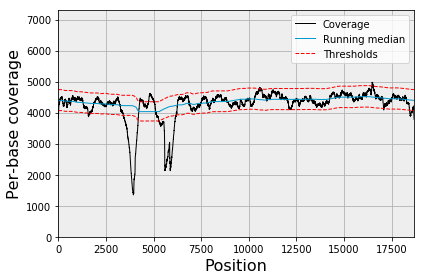

In [4]:
N = 4001
chrom.running_median(N, circular=True)
chrom.compute_zscore()
chrom.plot_coverage()

## Interactive view of the effects of the running window

In [5]:
from ipywidgets import interact, interactive, fixed
import ipywidgets as widgets

In [6]:
def f(N):
    chrom.running_median(N, circular=True)
    chrom.compute_zscore()
    chrom.plot_coverage()
    ylim([1000,5500])
    plt.show()
    # plt.show is to fix issue reported in :
    # https://stackoverflow.com/questions/44329068/jupyter-notebook-interactive-plot-with-widgets

In [7]:
interact(f, N=widgets.IntSlider(min=501,max=16001, step=200))

<function __main__.f>

## Region of interests

In [8]:
chrom.running_median(4101)

In [9]:
chrom.compute_zscore()

In [10]:
chrom.get_roi().get_low_roi()

,chr,start,end,size,mean_cov,max_cov,mean_rm,mean_zscore,max_zscore
0,virus,3410,4193,783,2819.605364,3914,4202.469987,-8.565504,-17.556643
3,virus,5273,6189,916,3087.579694,3928,4154.421397,-6.701898,-12.760033
5,virus,12211,12212,1,4101.000000,4101,4423.000000,-2.008764,-2.008764


## Some statistics

In [11]:
print(chrom)


Genome length: 18686
Sequencing depth (DOC):  4257.52 
Sequencing depth (median):  4383.50 
Breadth of coverage (BOC) (percent): 100.00 
Genome coverage standard deviation :   489.60 
Genome coverage coefficient variation :     0.11 


In [12]:
chrom.get_centralness()

0.88552927325270259

In [13]:
print(chrom.get_stats())

{"Description":{"0":"breadth of coverage: the proportion (in %s) of the genome covered by at least one read.","1":"the coefficient of variation.","2":"the sequencing depth (Depth of Coverage), that is the average of the genome coverage.","3":"median of the absolute median deviation defined as median(|X-median(X)|).","4":"Median of the coverage.","5":"standard deviation."},"Value":{"0":100.0,"1":0.1149954984,"2":4257.5164294124,"3":126.5,"4":4383.5,"5":489.5952237708},"name":{"0":"BOC","1":"CV","2":"DOC","3":"MAD","4":"Median","5":"STD"}}


## GC correlation

In [14]:
filename = sequana_data("JB409847.bed")
reference = sequana_data("JB409847.fasta")

gc = GenomeCov(filename)
gc.compute_gc_content(reference)

In [15]:
chrom = gc[0]
chrom.get_gc_correlation()

-0.61946655536887563

Computing 2D histogram. Please wait


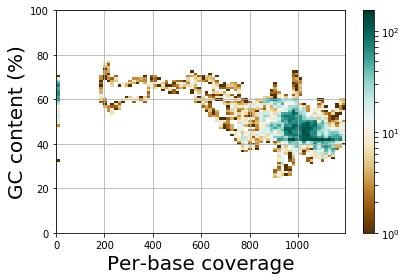

In [16]:
chrom.plot_gc_vs_coverage(cmap="BrBG", Nlevels=0, bins=[80,50])